In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline 

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()    # to check the Null values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

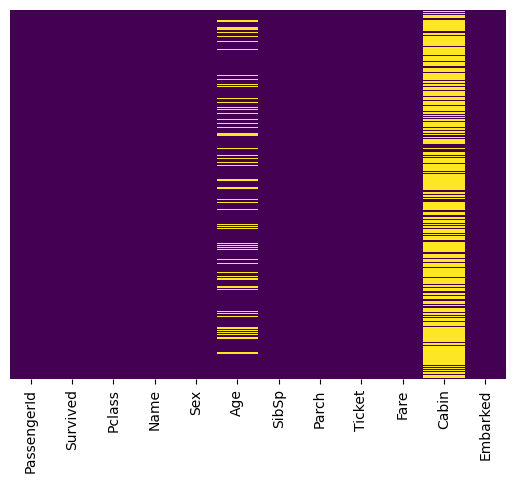

In [5]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

# with the help of heatmap we find the Null values ie Missing info

<AxesSubplot:xlabel='Survived', ylabel='count'>

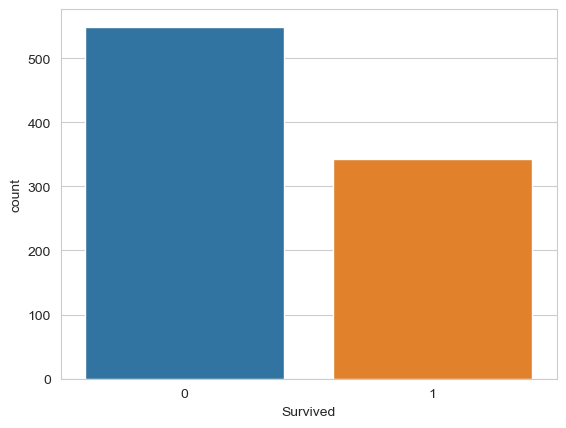

In [6]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

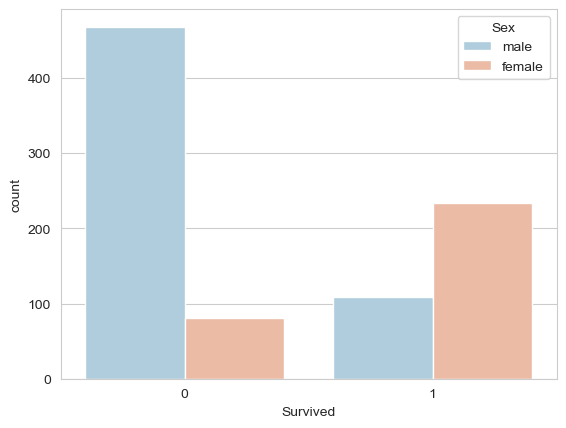

In [7]:
sns.countplot(data=train, x='Survived', hue='Sex',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

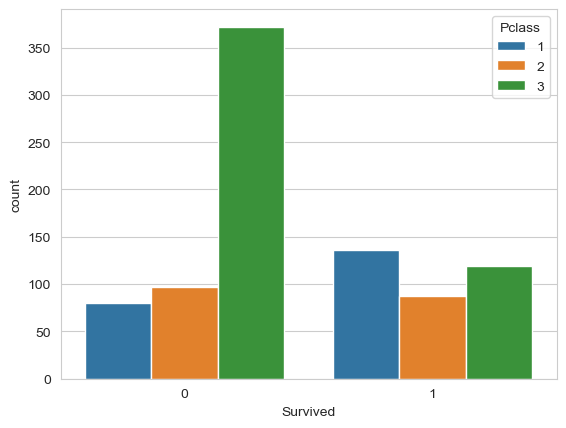

In [8]:
sns.countplot(data=train, x='Survived', hue='Pclass')

C:\Users\USER\anaconda3\envs\data_env_old\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

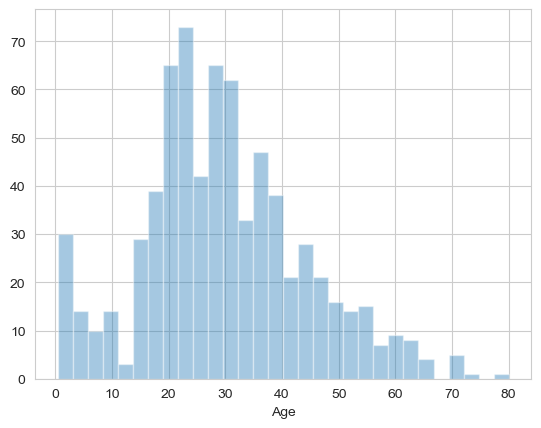

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

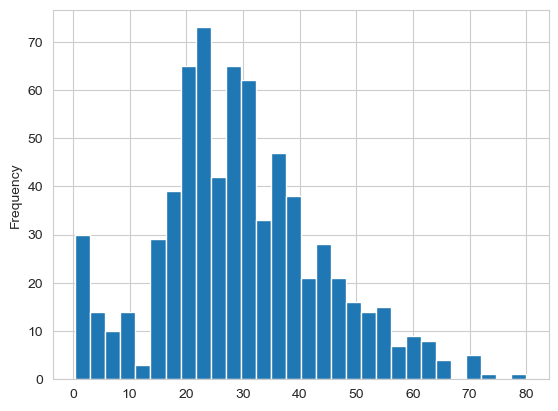

In [10]:
train['Age'].plot.hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

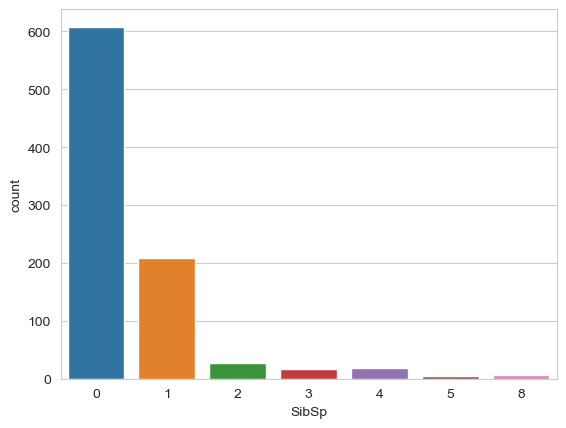

In [11]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

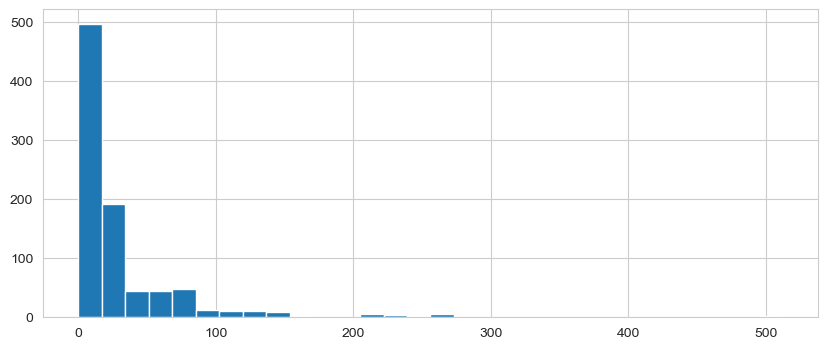

In [12]:
train['Fare'].hist(bins=30, figsize=(10,4))

In [13]:
import cufflinks as cf
import plotly
from plotly.offline import init_notebook_mode
import plotly.express as px


In [14]:
init_notebook_mode(connected=True)
cf.go_offline()

In [15]:
# train.iplot(kind='hist',x='Fare')

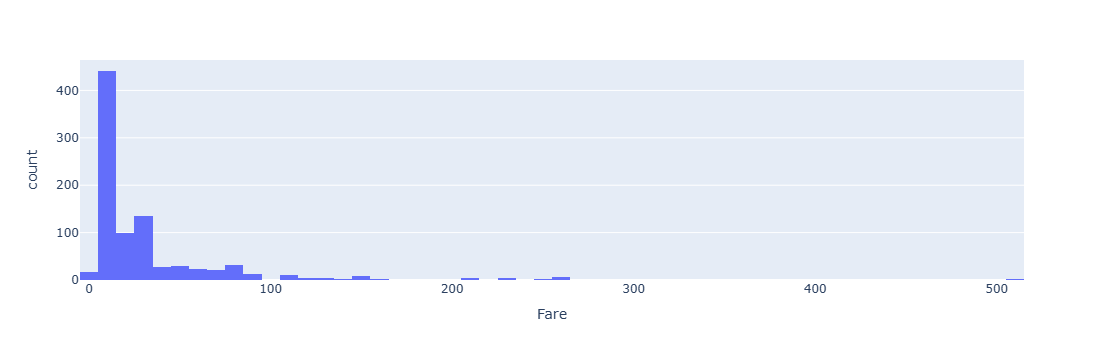

In [16]:
px.histogram(data_frame=train, x='Fare')

In [18]:
# train['Fare'].iplot(kind='hist', bins=20, title='Fare Distribution')

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [21]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

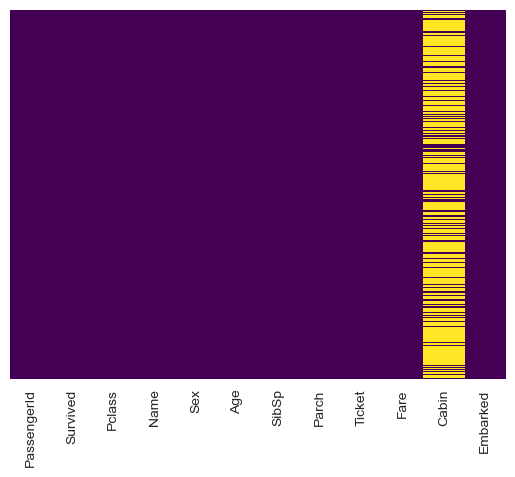

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [42]:
# pd.get_dummies(train['Sex'])

In [27]:
sex = pd.get_dummies(train['Sex'], drop_first=True)              # this will drop the first col
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
train = pd.concat([train, sex, embark])
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,NaN,NaN,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,NaN,NaN,NaN


In [30]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [31]:
train.drop('PassengerId', axis=1, inplace=True)

In [32]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3.0,22.0,1.0,0.0,7.2500,NaN,NaN,NaN
1,1.0,1.0,38.0,1.0,0.0,71.2833,NaN,NaN,NaN
2,1.0,3.0,26.0,0.0,0.0,7.9250,NaN,NaN,NaN
3,1.0,1.0,35.0,1.0,0.0,53.1000,NaN,NaN,NaN
4,0.0,3.0,35.0,0.0,0.0,8.0500,NaN,NaN,NaN


In [33]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()

In [44]:
# logmodel.fit(X_train, y_train)